In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
score=[]

In [2]:
big_mart_data=pd.read_csv("D:\\campus_x\\big\\train.csv")
big_mart_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
628,FDX09,NaN,Low Fat,0.064933,Snack Foods,174.8370,OUT027,1985,Medium,Tier 3,Supermarket Type3,4763.7990
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
6600,NCE31,7.67,Low Fat,0.185131,Household,32.9216,OUT049,1999,Medium,Tier 1,Supermarket Type1,588.5672
7413,FDH53,20.50,Regular,0.019278,Frozen Foods,82.8592,OUT018,2009,Medium,Tier 3,Supermarket Type2,1733.7432
4547,FDX01,10.10,Low Fat,0.024160,Canned,114.7150,OUT035,2004,Small,Tier 2,Supermarket Type1,815.6050


In [3]:
#big_mart_data.info()

In [4]:
#big_mart_data.describe()
#big_mart_data.isnull().sum()

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [6]:
trf1=ColumnTransformer([('SI1',SimpleImputer(strategy='most_frequent'),['Outlet_Size']),
                       ('SI2',SimpleImputer(),['Item_Weight'])],remainder='passthrough')

In [7]:
abc=trf1.fit_transform(big_mart_data)

In [8]:
big_mart_data1=pd.DataFrame(abc,columns=['Outlet_Size','Item_Weight','Item_Identifier','Item_Fat_Content','Item_Visibility',
                                        'Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year',
                                        'Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales'])

In [9]:
big_mart_data1 = big_mart_data1.astype({'Outlet_Size':object,'Item_Weight':float,'Item_Identifier':object,'Item_Fat_Content':object,'Item_Visibility':float,
                                        'Item_Type':object,'Item_MRP':float,'Outlet_Identifier':object,'Outlet_Establishment_Year':int,
                                        'Outlet_Location_Type':object,'Outlet_Type':object,'Item_Outlet_Sales':float})

In [10]:
#big_mart_data1.isnull().sum()

In [11]:
big_mart_data1.head(2)

,Outlet_Size,Item_Weight,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Medium,9.30,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,Medium,5.92,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228


In [12]:
big_mart_data1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
big_mart_data1.replace({'Item_Fat_Content': {'low fat':'LF','Low Fat':'LF','Regular':'R','reg':'R'}}, inplace=True)

In [14]:
big_mart_data1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x=big_mart_data1.iloc[:,:-1]
y=big_mart_data1.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [17]:
'''3 Item_Fat_Content    :     one hot    
   2 Item_Identifier     :     one hot
   5 Item_Type           :     one hot     
   7 Outlet_Identifier   :     one hot
   0 Outlet_Size         :     one hot
   9 Outlet_Location_Type:     one hot
  10 Outlet_Type         :     one hot

#check with this
big_mart_data1['Outlet_Location_Type'].value_counts()

'''

"3 Item_Fat_Content    :     one hot    \n   2 Item_Identifier     :     one hot\n   5 Item_Type           :     one hot     \n   7 Outlet_Identifier   :     one hot\n   0 Outlet_Size         :     one hot\n   9 Outlet_Location_Type:     one hot\n  10 Outlet_Type         :     one hot\n\n#check with this\nbig_mart_data1['Outlet_Location_Type'].value_counts()\n\n"

In [18]:
trf2=ColumnTransformer([('IFC',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,2,3,5,7,9,10])
                       ],remainder='passthrough')

In [19]:
x_train_new=trf2.fit_transform(x_train)
x_test_new=trf2.transform(x_test)
x_train_new

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.42239420e-02, 1.42015400e+02, 2.00400000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.01747034e-01, 2.31330000e+02, 1.98700000e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.69109140e-02, 9.66410000e+01, 1.98500000e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.16793684e-01, 4.10112000e+01, 1.98500000e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.44800500e-03, 1.02101600e+02, 1.98500000e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00060762e-01, 1.44078600e+02, 2.00200000e+03]])

In [20]:
print(x.shape, x_train.shape, x_train_new.shape)
print(x.shape, x_test.shape, x_test_new.shape)

(8523, 11) (6818, 11) (6818, 1595)
(8523, 11) (1705, 11) (1705, 1595)


In [21]:
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(x_train_new, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
reg.fit(x_train_new, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
y_pred = reg.predict(x_test_new)

In [24]:
y_pred.shape

(1705,)

In [25]:
y_test.shape

(1705,)

In [26]:
from sklearn import metrics
r2_test =metrics.r2_score(y_test, y_pred)
score.append(("Xg",r2_test))
r2_test

0.552530880152359

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf=RandomForestRegressor(n_estimators=10)

In [29]:
rf.fit(x_train_new,y_train)

RandomForestRegressor(n_estimators=10)

In [30]:
y_pred_rand=rf.predict(x_test_new)

In [31]:
r3_test =metrics.r2_score(y_test, y_pred_rand)
score.append(("Random_Forest",r3_test))
r3_test

0.5168997253337404

E:\abc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


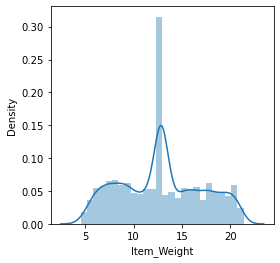

E:\abc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


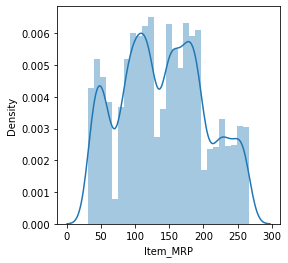

E:\abc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


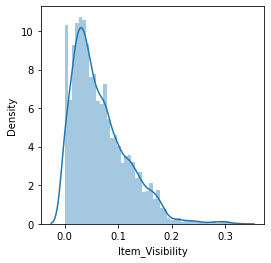

E:\abc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


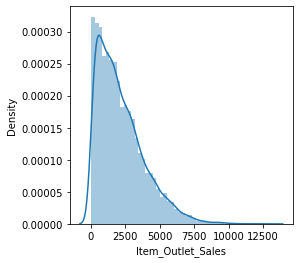

In [32]:
plt.figure(figsize=(4,4))
sns.distplot(big_mart_data1['Item_Weight'])
plt.show()

plt.figure(figsize=(4,4))
sns.distplot(big_mart_data1['Item_MRP'])
plt.show()


plt.figure(figsize=(4,4))
sns.distplot(big_mart_data1['Item_Visibility'])
plt.show()


plt.figure(figsize=(4,4))
sns.distplot(big_mart_data1['Item_Outlet_Sales'])
plt.show()


In [33]:
from sklearn import preprocessing
var=preprocessing.MinMaxScaler()
var.fit(x_train_new)
x_train_new1=var.transform(x_train_new)
x_test_new1=var.transform(x_test_new)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg12 = LinearRegression()
reg12.fit(x_train_new1, y_train)
reg12.score(x_test_new1,y_test)

-8.489301922850954e+21

In [36]:
y_pred_linear=reg12.predict(x_test_new1)
y_pred_linear

array([ 738., 4128., 1112., ..., 1952., 2928.,  112.])

In [37]:
r4_test =metrics.r2_score(y_test, y_pred_linear)
score.append(("LR",r4_test))
r4_test

-8.489301922850954e+21

In [38]:
score

[('Xg', 0.552530880152359),
 ('Random_Forest', 0.5168997253337404),
 ('LR', -8.489301922850954e+21)]

In [39]:
from sklearn import model_selection

In [40]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor()))
models.append(('XG', XGBRegressor()))

In [41]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=2)
    cv_results = model_selection.cross_val_score(model, x_train_new, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -1295065850741757952.000000 (12402215844173440.000000)
RF: 0.562469 (0.003964)
XG: 0.566841 (0.001360)
